Product Back orders *What is a backorder? : A customer order that has not been fulfilled.
A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Total backorders, also known as backlog, may be expressed in terms of units or dollar amount. *Product backorder may be the result of strong sales performance (e.g. the product is in such high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs). *Machine learning can identify patterns related to backorders before customers order. Production can then adjust to minimize delays while customer service can provide accurate dates to keep customers informed and happy. The predictive analytics approach enables the maximum product to get in the hands of customers at the lowest cost to the organization.

DATA : The data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data were taken as weekly snapshots at the start of each week. The target (or response) is the went_on_backorder variable. To model and predict the target, we’ll use the other features, which include:

sku – Random ID for the product
national_inv – Current inventory level for the part
lead_time – Transit time for product (if available)
in_transit_qty – Amount of product in transit from source
forecast_3_month – Forecast sales for the next 3 months
forecast_6_month – Forecast sales for the next 6 months
forecast_9_month – Forecast sales for the next 9 months
sales_1_month – Sales quantity for the prior 1 month time period
sales_3_month – Sales quantity for the prior 3 month time period
sales_6_month – Sales quantity for the prior 6 month time period
sales_9_month – Sales quantity for the prior 9 month time period
min_bank – Minimum recommend amount to stock
potential_issue – Source issue for part identified
pieces_past_due – Parts overdue from source
perf_6_month_avg – Source performance for prior 6 month period
perf_12_month_avg – Source performance for prior 12 month period
local_bo_qty – Amount of stock orders overdue
deck_risk – Part risk flag
oe_constraint – Part risk flag
ppap_risk – Part risk flag
stop_auto_buy – Part risk flag
rev_stop – Part risk flag
went_on_backorder – Product actually went on backorder. This is the target value.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

C:\Users\niran\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\niran\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
train = pd.read_csv('Kaggle_Training_Dataset_v2.csv')
test = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

C:\Users\niran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#creating a copy of dataframe
df_train = train.copy(deep=True)
df_test = test.copy(deep=True)

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
print("Number of rows are:-",df_train.shape[0],"\nNumber of columns are :-",df_train.shape[1])

Number of rows are:- 1687861 
Number of columns are :- 23


Thet training dataset contains about 1.6 Million rows and 23 Columns.

In [7]:
df_train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [250]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1558382 non-null float64
perf_12_month_avg    1565810 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk            1687860 non-null object
stop_auto_buy    

There are totally 15 numerical variables namely : natinal_inv, lead_time, in_transit_qty, forecast_3_month, forecast_6_month, forecast_9_month, sales_1_month, sales_3_month, sales_6_month, sales_9_month, min_bank, pieces_past_due, 
perf_6_month_avg, perf_12_month_avg and local_bo_qty.

There are totally 7 Categorical Variables namely: potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, 
rev_stop and went_on_backorder.

'sku' is part id  which uniquely identifies each part

In [9]:
df_train.describe().T #numerical variables

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


The fivepoit Summary(Q1,Q2,Q3,Min and Max) of all Attributes can be seen above.

We can see that all numerical variables are highly right skewed except perf_6_month_avg and perf_12_month_avg which contains -99 as a placeholder which is to be converted to a null value and treated.


In [10]:
#making it Nan first and then replacing to avoid misinterpretation
df_train['perf_6_month_avg'].replace(-99,np.NaN, inplace=True)
df_train['perf_12_month_avg'].replace(-99,np.NaN,inplace=True)

In [11]:
df_train.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg     129479
perf_12_month_avg    122051
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [12]:
#Percentage of Null Values present
for col in df_train.columns:
    pt = (df_train[col].isnull().sum() / len(df_train[col]))*100
    print(f'Percetage of Null in {col} is {pt}')

Percetage of Null in sku is 0.0
Percetage of Null in national_inv is 5.924658487873112e-05
Percetage of Null in lead_time is 5.977624934754698
Percetage of Null in in_transit_qty is 5.924658487873112e-05
Percetage of Null in forecast_3_month is 5.924658487873112e-05
Percetage of Null in forecast_6_month is 5.924658487873112e-05
Percetage of Null in forecast_9_month is 5.924658487873112e-05
Percetage of Null in sales_1_month is 5.924658487873112e-05
Percetage of Null in sales_3_month is 5.924658487873112e-05
Percetage of Null in sales_6_month is 5.924658487873112e-05
Percetage of Null in sales_9_month is 5.924658487873112e-05
Percetage of Null in min_bank is 5.924658487873112e-05
Percetage of Null in potential_issue is 5.924658487873112e-05
Percetage of Null in pieces_past_due is 5.924658487873112e-05
Percetage of Null in perf_6_month_avg is 7.671188563513227
Percetage of Null in perf_12_month_avg is 7.231104931034013
Percetage of Null in local_bo_qty is 5.924658487873112e-05
Percetage 

We can see that there is less than 10 percentage of Null values in each attribute, hence we can impute them.

## Data Cleaning

In [13]:
#removing last row since it has no useful values

In [14]:
df_train = df_train[0:1687860]

In [15]:
df_train.shape

(1687860, 23)

In [16]:
#Removing sku as it a random id for order items
df_train = df_train.drop('sku',axis=1)

In [17]:
df_train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,NaN,NaN,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No


Null value imputation -  by median for lead time.  
Since the variables are right skewed, the null values are imputed by median rather than means

In [18]:

df_train2 = df_train.copy(deep=True)

In [19]:
df_train2['lead_time'] = df_train2['lead_time'].fillna(df_train2['lead_time'].median())

In [20]:
df_train2['perf_6_month_avg'] = df_train2['perf_6_month_avg'].fillna(df_train2['perf_6_month_avg'].median())

In [21]:
df_train2['perf_12_month_avg'] = df_train2['perf_12_month_avg'].fillna(df_train2['perf_12_month_avg'].median())

In [22]:
df_train2.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

All Null Values are Treated.

In [23]:
#Binning Lead Time
#Creating groups for lead time, since most lead times are frequently occuring over huge observations


In [24]:
#labels
cut_labels = []
for i in range(1,20):
    x = 'lead_time'+ str(i)
    cut_labels.append(x)
print(cut_labels)

['lead_time1', 'lead_time2', 'lead_time3', 'lead_time4', 'lead_time5', 'lead_time6', 'lead_time7', 'lead_time8', 'lead_time9', 'lead_time10', 'lead_time11', 'lead_time12', 'lead_time13', 'lead_time14', 'lead_time15', 'lead_time16', 'lead_time17', 'lead_time18', 'lead_time19']


In [25]:
pd.cut(df_train2['lead_time'], bins=np.linspace(1,58,20)).value_counts()

(7.0, 10.0]     920920
(1.0, 4.0]      482192
(10.0, 13.0]    206199
(49.0, 52.0]     30113
(13.0, 16.0]     22969
(4.0, 7.0]        9605
(16.0, 19.0]      4012
(19.0, 22.0]       598
(28.0, 31.0]       312
(25.0, 28.0]       189
(22.0, 25.0]       136
(37.0, 40.0]        48
(34.0, 37.0]        35
(52.0, 55.0]         0
(31.0, 34.0]         0
(40.0, 43.0]         0
(43.0, 46.0]         0
(46.0, 49.0]         0
(55.0, 58.0]         0
Name: lead_time, dtype: int64

In [26]:
cut_bins = np.linspace(1,58,20)
df_train2.insert(2,'lead_time_bins',pd.cut(df_train2['lead_time'], bins=cut_bins,labels=cut_labels ))

In [27]:
df_train2 = df_train2.drop('lead_time',axis=1)

In [28]:
df_train2['lead_time_bins'] = df_train2['lead_time_bins'].astype('object')

In [29]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
national_inv         1687860 non-null float64
lead_time_bins       1677328 non-null object
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk            1687860 non-null object
stop_auto_buy     

### Exploratory Data Analysis

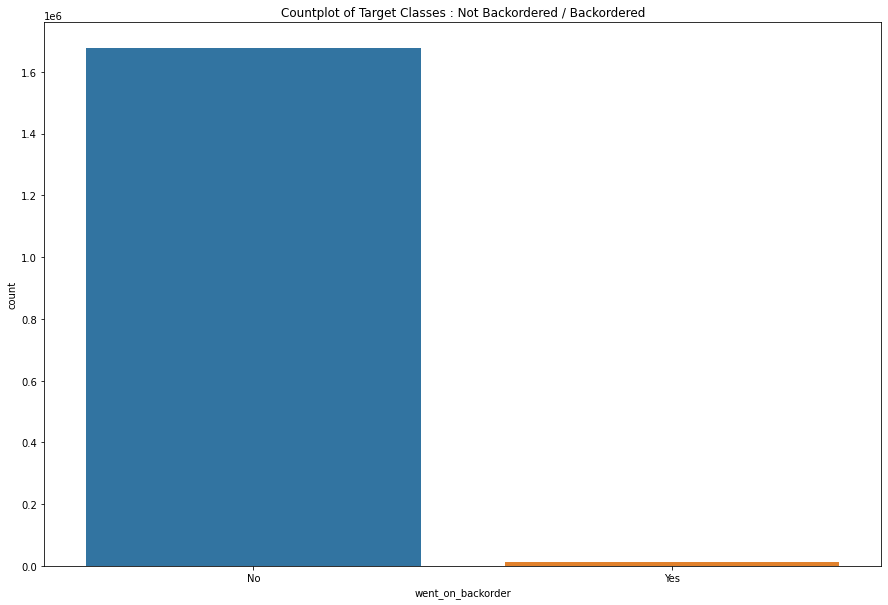

In [30]:

plt.figure(figsize=(15,10))
sns.countplot(df_train2['went_on_backorder'])
plt.title('Countplot of Target Classes : Not Backordered / Backordered')
plt.show()

We can see the target class is highly imbalanced

In [31]:
df_train2['went_on_backorder'].value_counts(normalize=True)

No     0.993309
Yes    0.006691
Name: went_on_backorder, dtype: float64

The orders that actually went into Backorder are less than 1 percentage.

Seperating Numerical and Categorical Variables.

In [32]:
#numberical variables
numervar = []
for i in df_train2.select_dtypes('float'):
    numervar.append(i)
print(numervar)


['national_inv', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


In [33]:
#categorical variables
catvar = []
for i in df_train2.select_dtypes('object'):
    catvar.append(i)
print(catvar)


['lead_time_bins', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [34]:
#summary of quantitative variables
df_train2[numervar].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0
min_bank,1687860.0,52.772303,1254.983089,0.0,0.00,0.00,3.00,313319.0


In [35]:
#means stratified by backorder
df_train2.pivot_table(values=numervar,index=['went_on_backorder'])

,forecast_3_month,forecast_6_month,forecast_9_month,in_transit_qty,local_bo_qty,min_bank,national_inv,perf_12_month_avg,perf_6_month_avg,pieces_past_due,sales_1_month,sales_3_month,sales_6_month,sales_9_month
went_on_backorder,,,,,,,,,,,,,,
No,178.259421,345.662315,507.579735,44.319523,0.600148,52.964627,499.309119,0.781325,0.788105,2.033727,56.104982,175.670378,343.092551,527.417690
Yes,157.314354,244.678916,325.939520,4.338617,4.531391,24.219782,21.432746,0.704457,0.707887,3.527849,29.364474,79.350748,139.271230,206.377668


The means of the Numerical Variables with respect to the target class can be seen in the pivot table.
The means are significantly different between the classes which can also be proved by statistical tests.

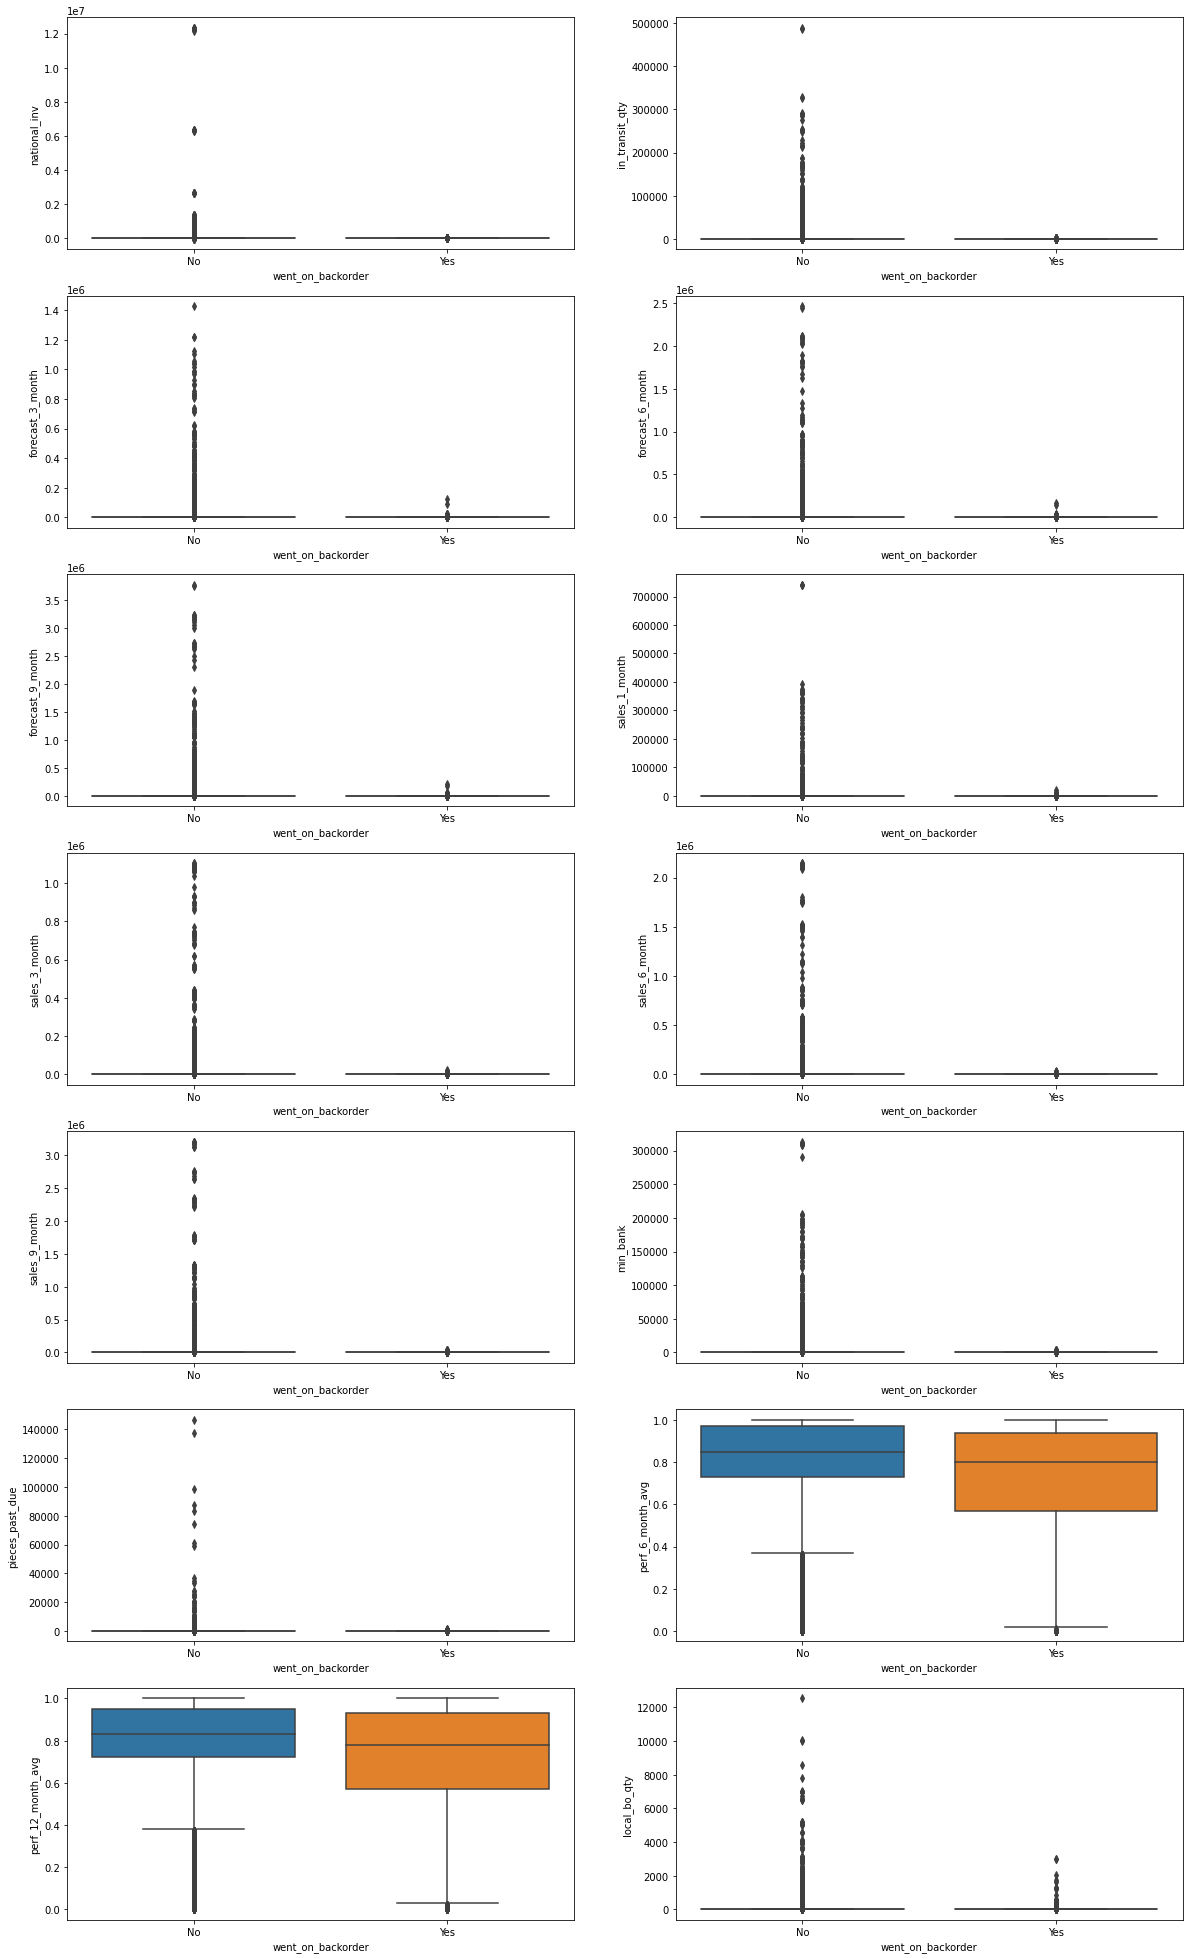

In [36]:
#Boxplots for all numerical variables Stratified by Target variable

fig,axes = plt.subplots(7,2,figsize=(20,35))

sns.boxplot(y = df_train2['national_inv'],x=df_train2['went_on_backorder'],ax=axes[0,0])

sns.boxplot(y = df_train2['in_transit_qty'],x=df_train2['went_on_backorder'],ax=axes[0,1])
sns.boxplot(y = df_train2['forecast_3_month'],x=df_train2['went_on_backorder'],ax=axes[1,0])
sns.boxplot(y = df_train2['forecast_6_month'],x=df_train2['went_on_backorder'],ax=axes[1,1])
sns.boxplot(y = df_train2['forecast_9_month'],x=df_train2['went_on_backorder'],ax=axes[2,0])
sns.boxplot(y = df_train2['sales_1_month'],x=df_train2['went_on_backorder'],ax=axes[2,1])
sns.boxplot(y = df_train2['sales_3_month'],x=df_train2['went_on_backorder'],ax=axes[3,0])
sns.boxplot(y = df_train2['sales_6_month'],x=df_train2['went_on_backorder'],ax=axes[3,1])
sns.boxplot(y = df_train2['sales_9_month'],x=df_train2['went_on_backorder'],ax=axes[4,0])
sns.boxplot(y = df_train2['min_bank'],x=df_train2['went_on_backorder'],ax=axes[4,1])
sns.boxplot(y = df_train2['pieces_past_due'],x=df_train2['went_on_backorder'],ax=axes[5,0])
sns.boxplot(y = df_train2['perf_6_month_avg'],x=df_train2['went_on_backorder'],ax=axes[5,1])
sns.boxplot(y = df_train2['perf_12_month_avg'],x=df_train2['went_on_backorder'],ax=axes[6,0])
sns.boxplot(y = df_train2['local_bo_qty'],x=df_train2['went_on_backorder'],ax=axes[6,1])
#fig.delaxes(axes[7,1])
plt.show()

The attributes perf_7_month_avg and perf_12_month_avg are left skewed for both the classes, where as other attributes 
are all right skewed for both the classes.

 The skewness of national_inv is 340.2858003326191
The kurtosis of national_inv is 131276.59257932162


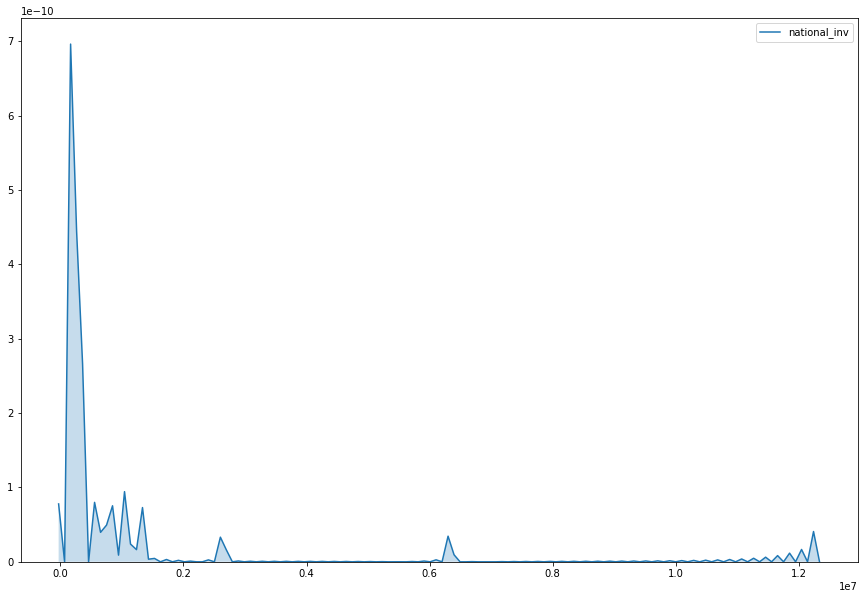

 The skewness of in_transit_qty is 166.18340424761558
The kurtosis of in_transit_qty is 39606.10405290813


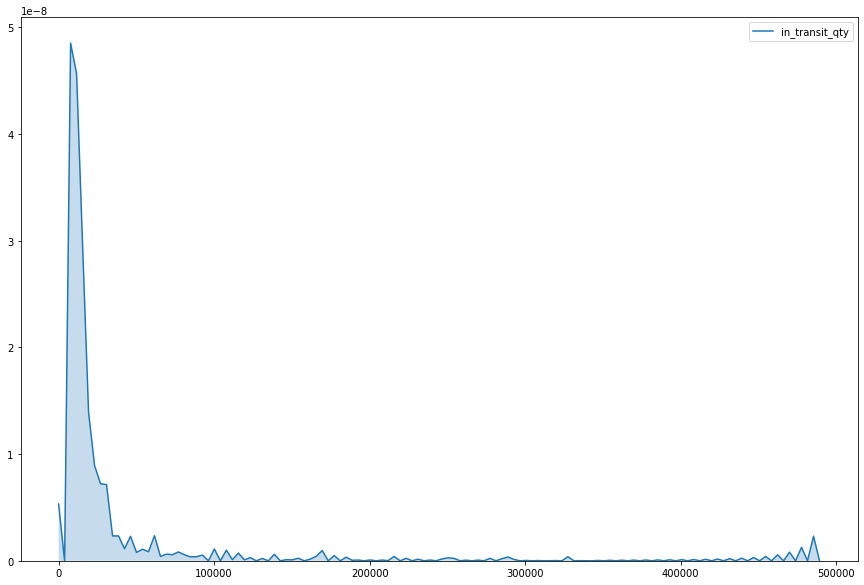

 The skewness of forecast_3_month is 138.96832519579834
The kurtosis of forecast_3_month is 25637.55029993227


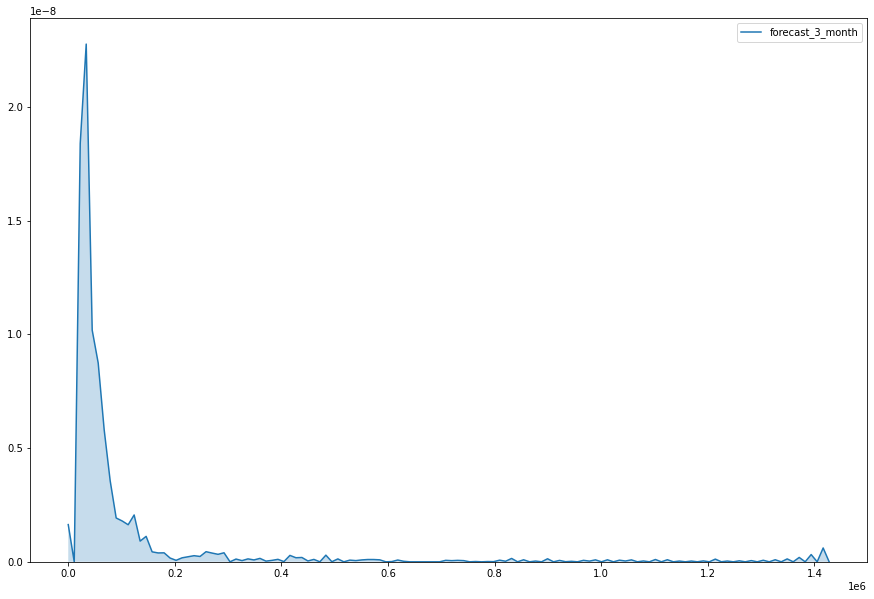

 The skewness of forecast_6_month is 138.96142721254265
The kurtosis of forecast_6_month is 25189.903788272073


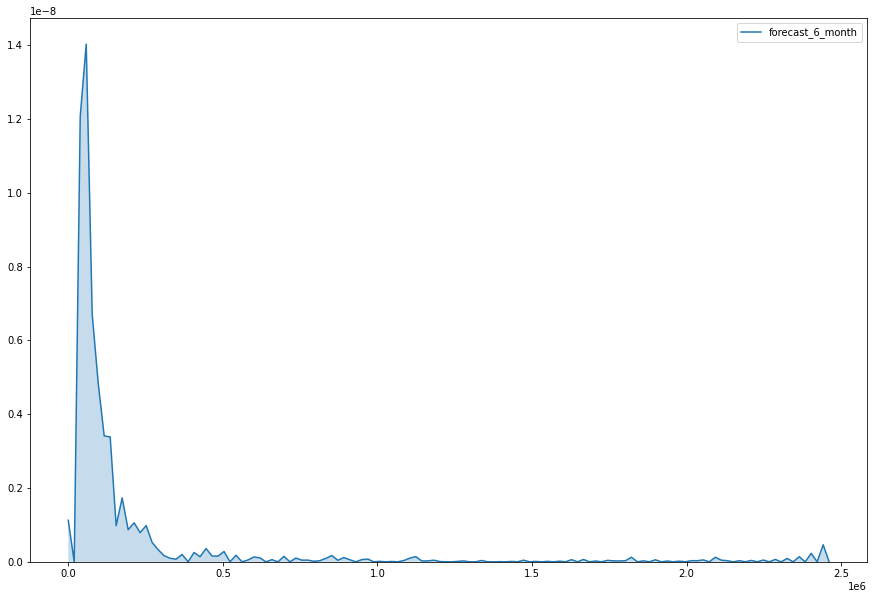

 The skewness of forecast_9_month is 143.298874740098
The kurtosis of forecast_9_month is 27048.452312581445


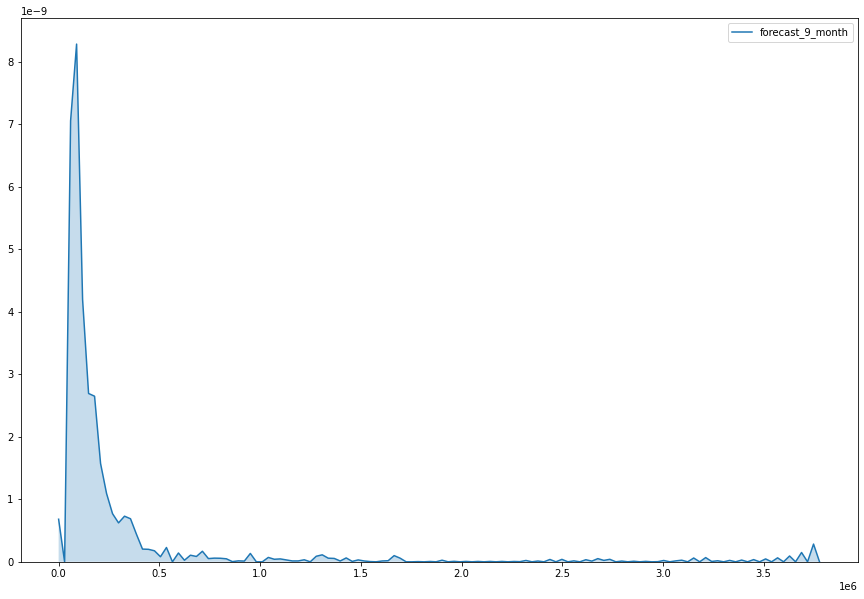

 The skewness of sales_1_month is 196.1199898556541
The kurtosis of sales_1_month is 53855.92556025887


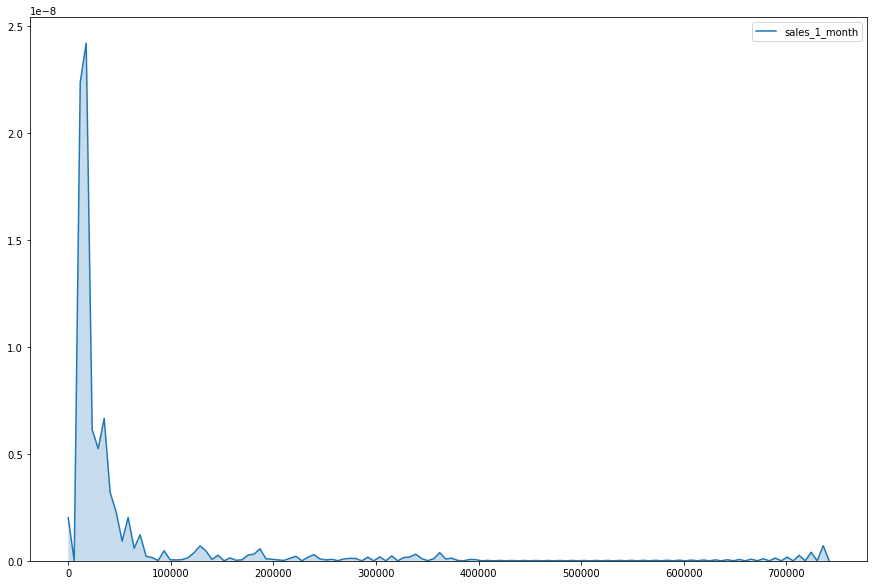

 The skewness of sales_3_month is 141.2863795444832
The kurtosis of sales_3_month is 24198.860650933373


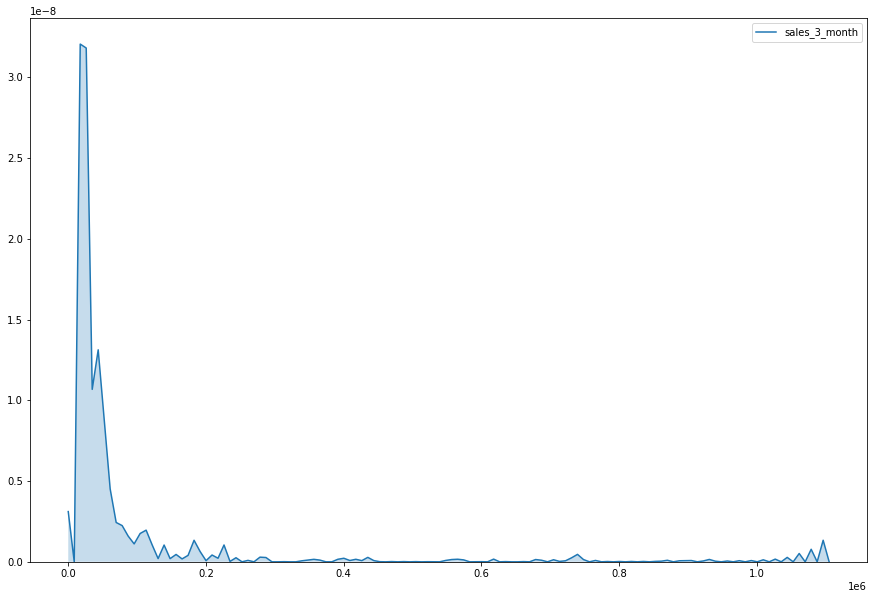

 The skewness of sales_6_month is 139.17671201086372
The kurtosis of sales_6_month is 24305.44501338931


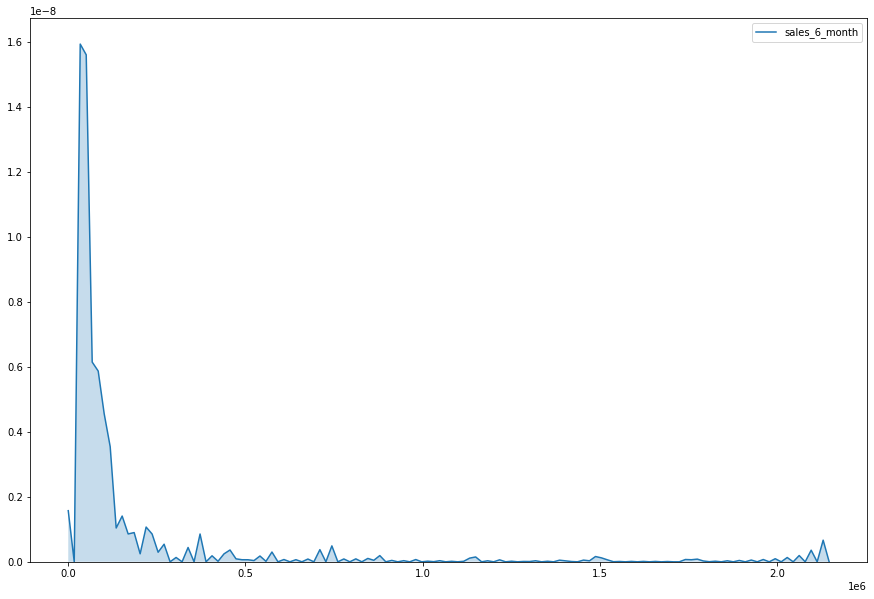

 The skewness of sales_9_month is 135.05419147168155
The kurtosis of sales_9_month is 22844.80574661239


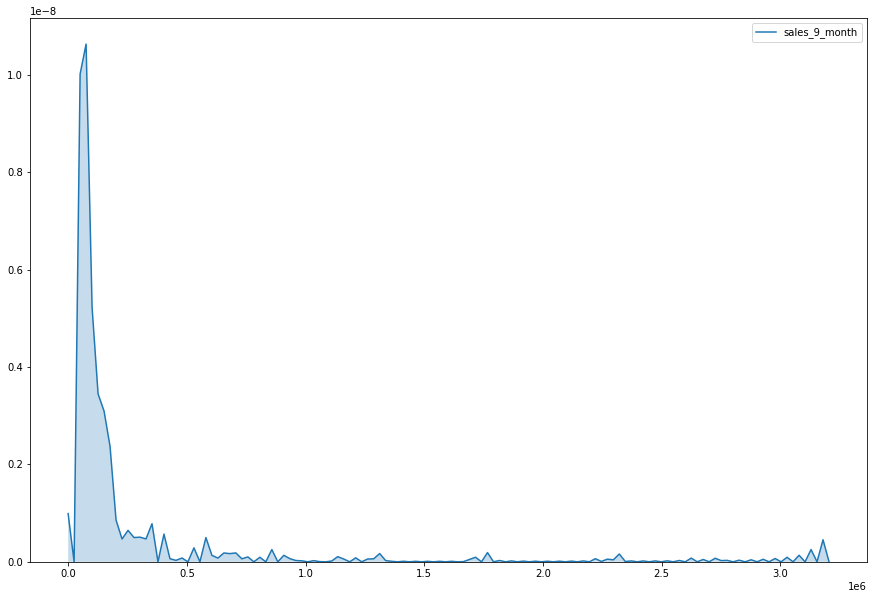

 The skewness of min_bank is 131.21264893012795
The kurtosis of min_bank is 23549.240091008585


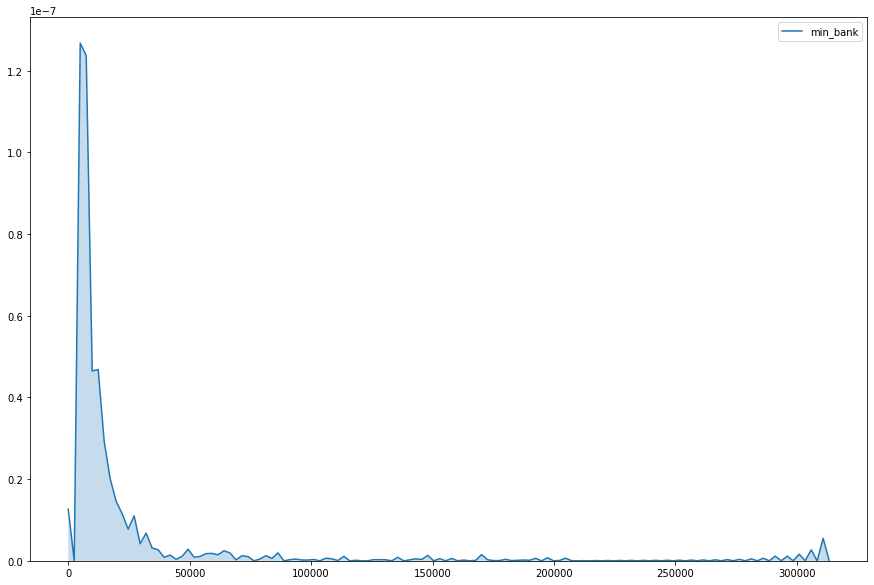

 The skewness of pieces_past_due is 412.39190039252696
The kurtosis of pieces_past_due is 207663.2258415861


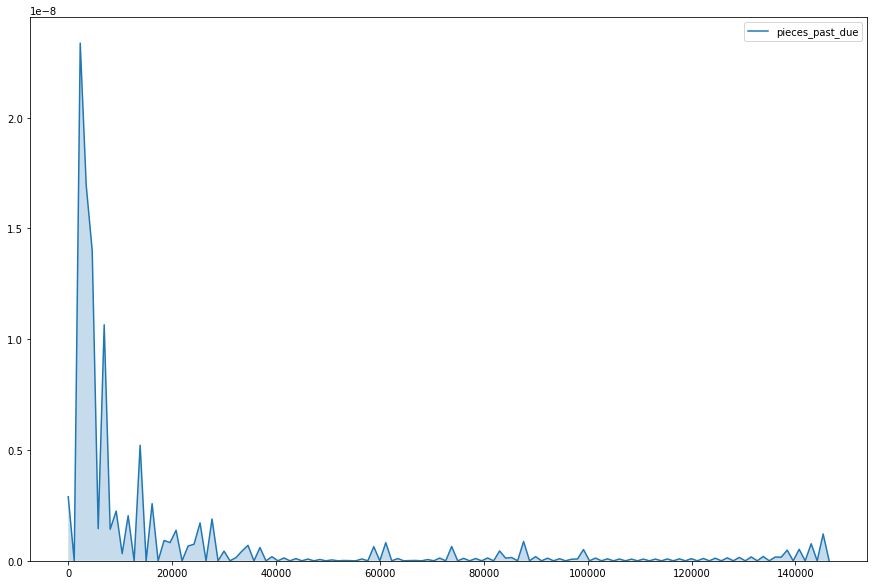

 The skewness of perf_6_month_avg is -1.700319497308823
The kurtosis of perf_6_month_avg is 2.795445243894803


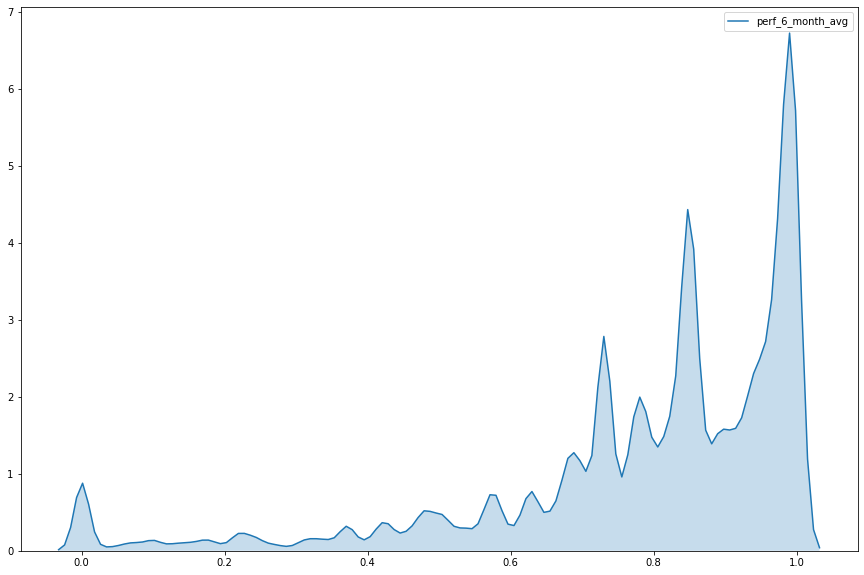

 The skewness of perf_12_month_avg is -1.720716663746112
The kurtosis of perf_12_month_avg is 2.9112752537169015


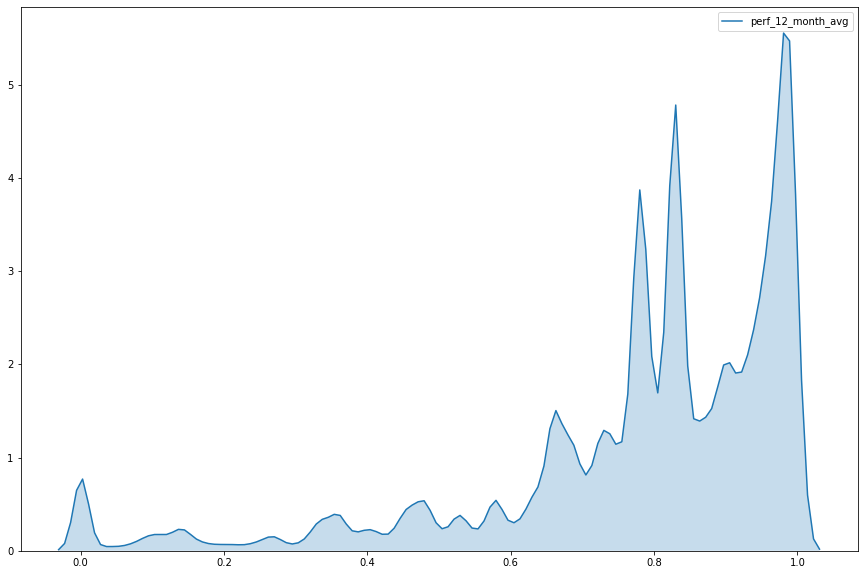

 The skewness of local_bo_qty is 165.19054793748316
The kurtosis of local_bo_qty is 38154.955457397235


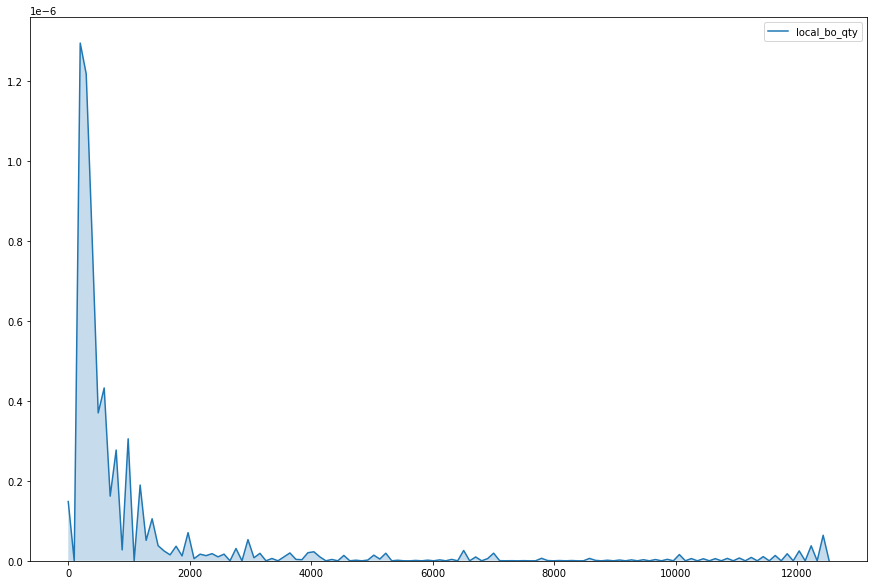

In [37]:
#histogram
for i in numervar:
    plt.figure(figsize=(15,10))
    print(f' The skewness of {i} is {df_train2[i].skew()}')
    print(f'The kurtosis of {i} is {df_train2[i].kurtosis()}')
    sns.kdeplot(df_train2[i],shade=True)
    label=i
    plt.show()

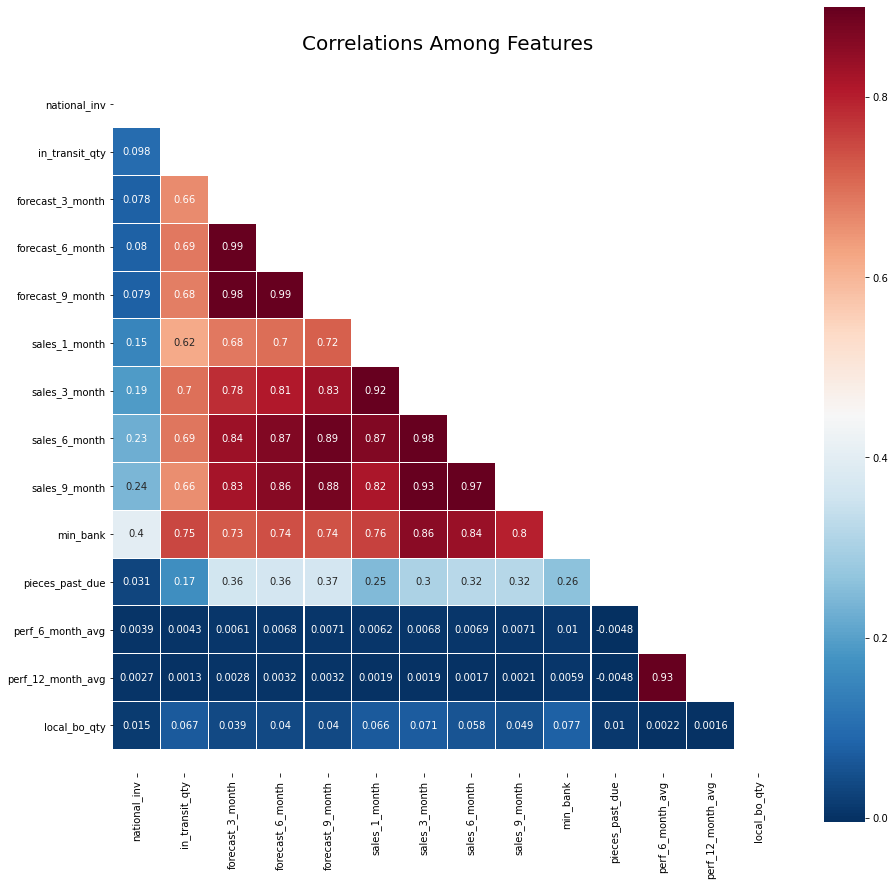

In [54]:
mask = np.zeros_like(df_train2[numervar].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(df_train2[numervar].corr(),
           annot=True,
           mask = mask,
           cmap = 'RdBu_r',
           linewidths=0.1,
           linecolor='white',
           vmax = .9,
           square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlations Among Features",fontsize = 20)
plt.show()

The highest correlation exists between forecast_6_month and forecast_3_month of about 0.99
The same way, high correlation exists between forecast_9_month and forecast_6_month of about 0.99

Similarly, we can see high correlation of more than 0.9 between Sales attributes


In [55]:
df_train2[numervar].corr()

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,0.003929,0.002697,0.014887
in_transit_qty,0.098238,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.004300,0.001344,0.066612
forecast_3_month,0.078199,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.006057,0.002815,0.039419
forecast_6_month,0.079744,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.006827,0.003187,0.039724
forecast_9_month,0.078948,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.007113,0.003243,0.039732
sales_1_month,0.147449,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.006216,0.001909,0.066188
sales_3_month,0.192605,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.006804,0.001913,0.071030
sales_6_month,0.225067,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.006859,0.001683,0.057765
sales_9_month,0.239613,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.007138,0.002067,0.048880
min_bank,0.399969,0.749974,0.725042,0.738553,0.735891,0.756137,0.856017,0.837110,0.800890,1.000000,0.262136,0.010232,0.005907,0.076678


Forecast and sales have high noise due to overlap of data quarter-wise

In [56]:
#categorical variables percentages
for col in catvar:
    print(col,'\n', df_train2[col].value_counts(normalize=True)*100)

lead_time_bins 
 lead_time3     54.903990
lead_time1     28.747627
lead_time4     12.293302
lead_time17     1.795296
lead_time5      1.369380
lead_time2      0.572637
lead_time6      0.239190
lead_time7      0.035652
lead_time10     0.018601
lead_time9      0.011268
lead_time8      0.008108
lead_time13     0.002862
lead_time12     0.002087
Name: lead_time_bins, dtype: float64
potential_issue 
 No     99.946263
Yes     0.053737
Name: potential_issue, dtype: float64
deck_risk 
 No     77.042942
Yes    22.957058
Name: deck_risk, dtype: float64
oe_constraint 
 No     99.985485
Yes     0.014515
Name: oe_constraint, dtype: float64
ppap_risk 
 No     87.923524
Yes    12.076476
Name: ppap_risk, dtype: float64
stop_auto_buy 
 Yes    96.380861
No      3.619139
Name: stop_auto_buy, dtype: float64
rev_stop 
 No     99.956691
Yes     0.043309
Name: rev_stop, dtype: float64
went_on_backorder 
 No     99.330928
Yes     0.669072
Name: went_on_backorder, dtype: float64


The proportion of lead_time_bins is 
 lead_time3     920920
lead_time1     482192
lead_time4     206199
lead_time17     30113
lead_time5      22969
lead_time2       9605
lead_time6       4012
lead_time7        598
lead_time10       312
lead_time9        189
lead_time8        136
lead_time13        48
lead_time12        35
Name: lead_time_bins, dtype: int64


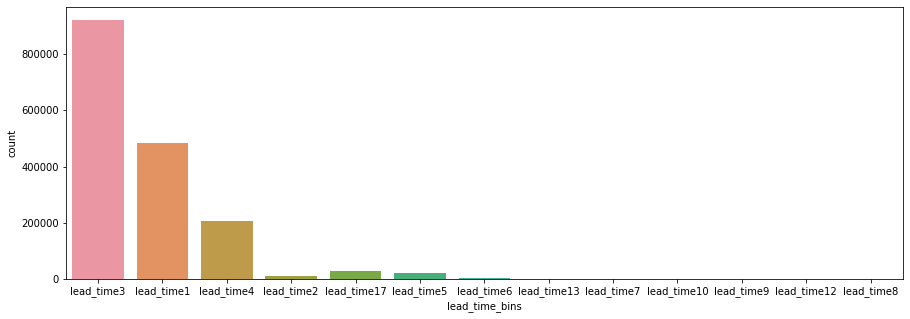

The proportion of potential_issue is 
 No     1686953
Yes        907
Name: potential_issue, dtype: int64


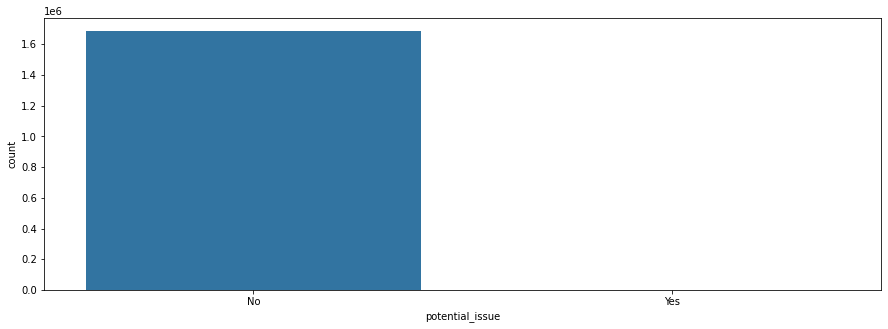

The proportion of deck_risk is 
 No     1300377
Yes     387483
Name: deck_risk, dtype: int64


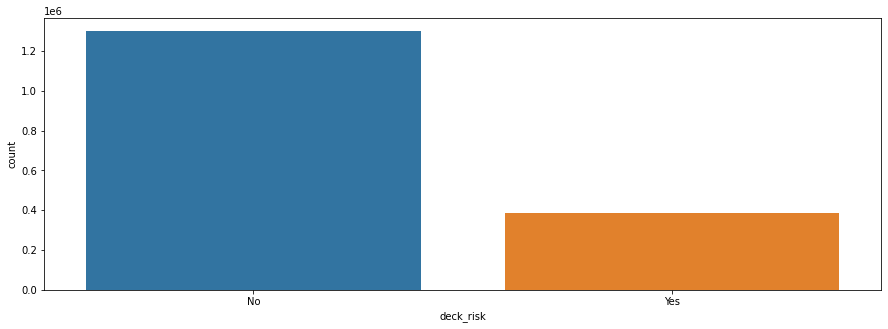

The proportion of oe_constraint is 
 No     1687615
Yes        245
Name: oe_constraint, dtype: int64


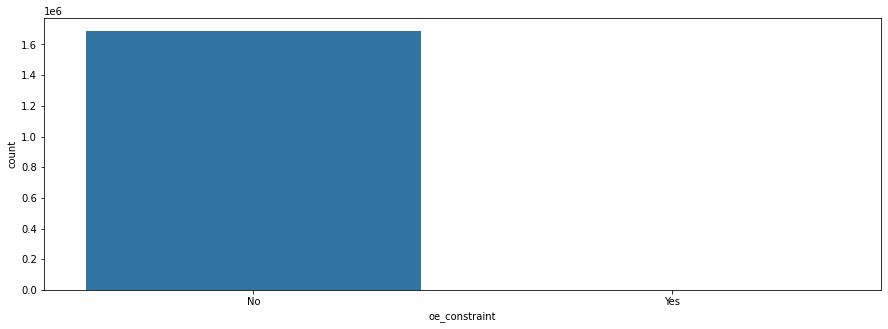

The proportion of ppap_risk is 
 No     1484026
Yes     203834
Name: ppap_risk, dtype: int64


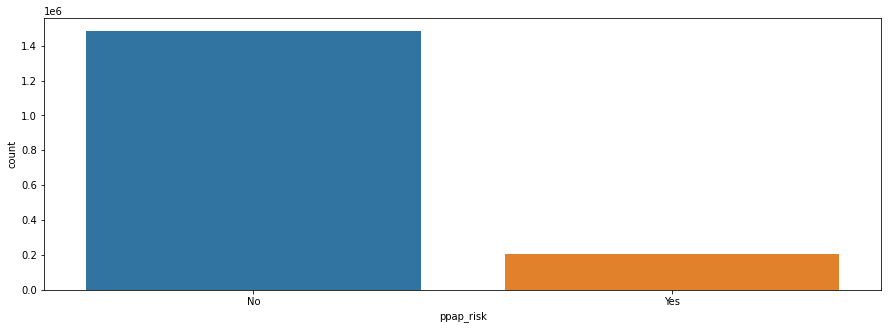

The proportion of stop_auto_buy is 
 Yes    1626774
No       61086
Name: stop_auto_buy, dtype: int64


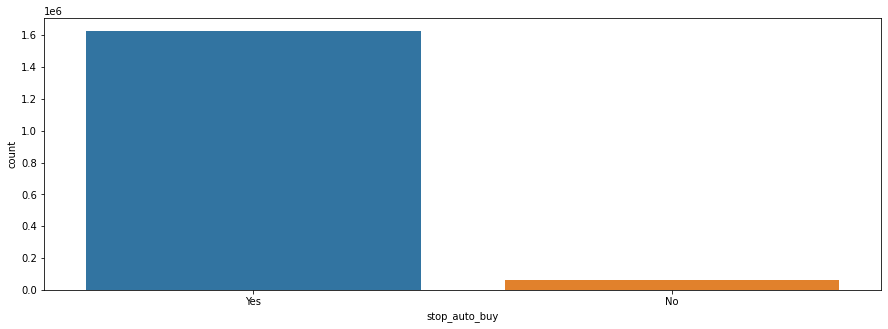

The proportion of rev_stop is 
 No     1687129
Yes        731
Name: rev_stop, dtype: int64


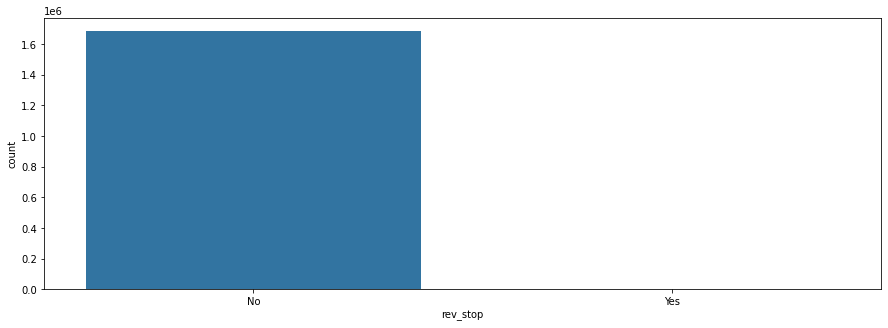

The proportion of went_on_backorder is 
 No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64


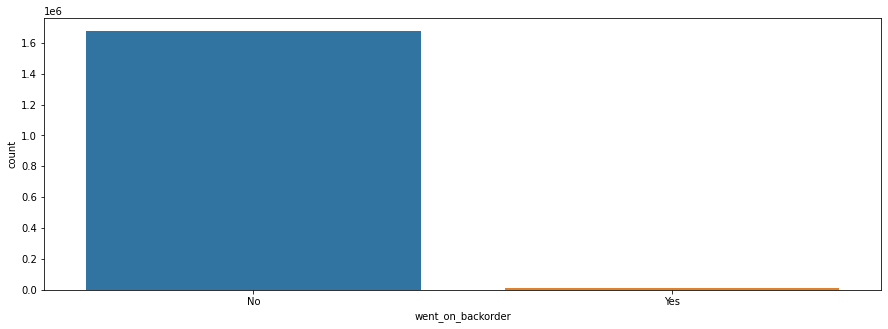

In [57]:
#Countplots for proportion of categorical variables
for col in catvar:
    plt.figure(figsize=(15,5))
    print(f'The proportion of {col} is \n {df_train2[col].value_counts()}')
    sns.countplot(df_train2[col])
    
    plt.show()
    

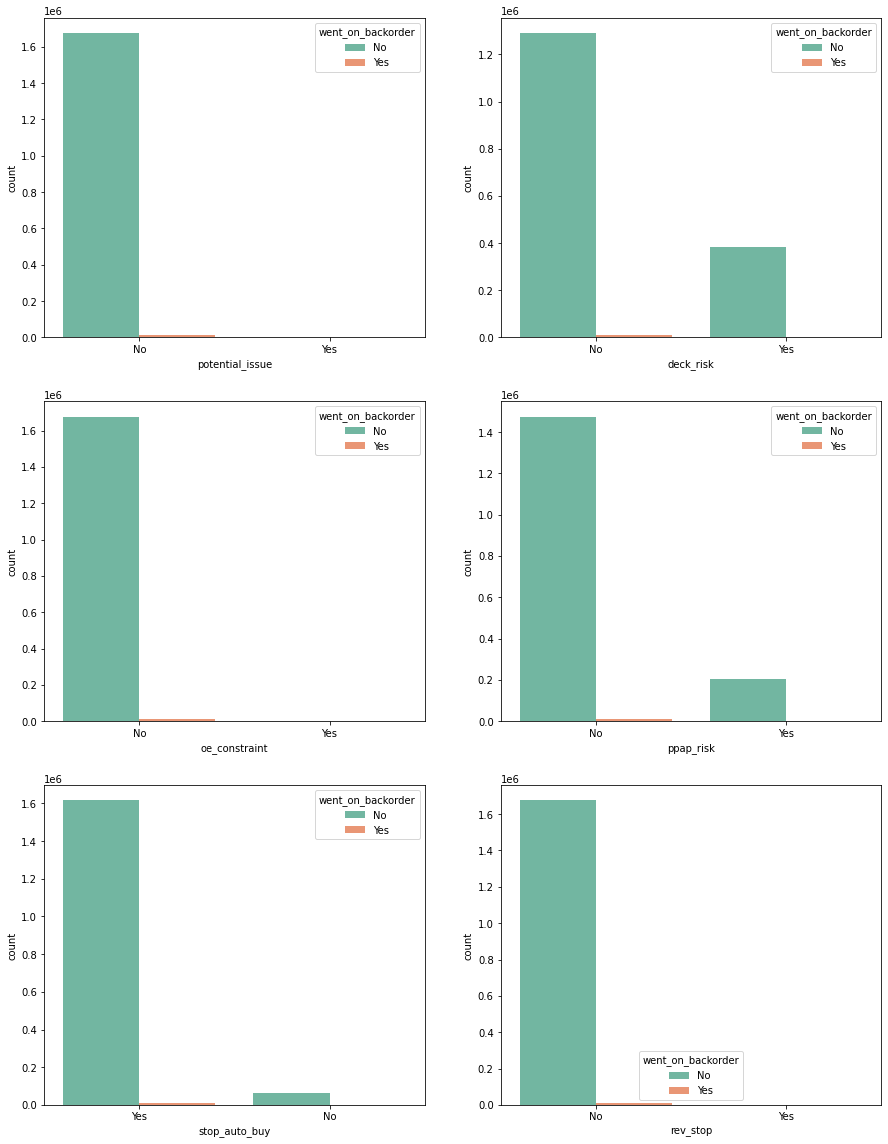

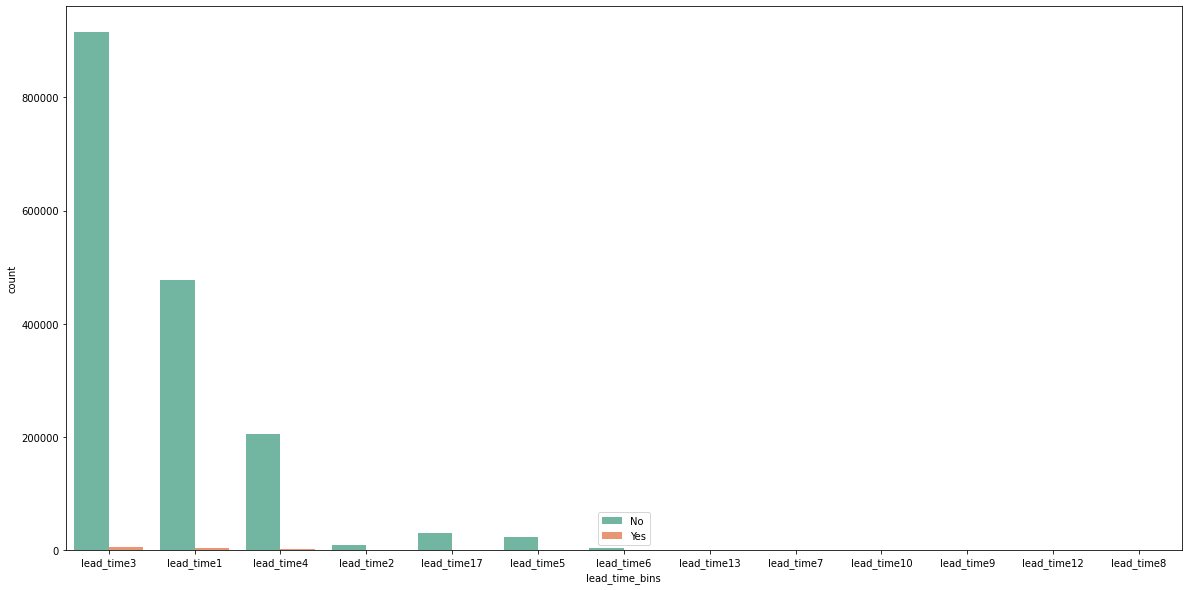

In [58]:
#Proportion of categorical variables stratified by backorder status

fig,axes = plt.subplots(3,2,figsize=(15,20))

sns.countplot(df_train2['potential_issue'],hue=df_train2['went_on_backorder'],ax=axes[0,0],palette="Set2")
sns.countplot(df_train2['deck_risk'],hue=df_train2['went_on_backorder'],ax=axes[0,1],palette="Set2")
sns.countplot(df_train2['oe_constraint'],hue=df_train2['went_on_backorder'],ax=axes[1,0],palette="Set2")
sns.countplot(df_train2['ppap_risk'],hue=df_train2['went_on_backorder'],ax=axes[1,1],palette="Set2")
sns.countplot(df_train2['stop_auto_buy'],hue=df_train2['went_on_backorder'],ax=axes[2,0],palette="Set2")
sns.countplot(df_train2['rev_stop'],hue=df_train2['went_on_backorder'],ax=axes[2,1],palette="Set2")
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(df_train2['lead_time_bins'],hue=df_train2['went_on_backorder'],palette="Set2")
plt.legend()
plt.show()

In [38]:
#converting category into 0's and 1's
for i in df_train2.select_dtypes('object'):
    if i != 'lead_time_bins':
        df_train2[i] = df_train2[i].map({'Yes':1,'No':0}).astype('int')

In [39]:
df_train2

,national_inv,lead_time_bins,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,0,0,0,1,0,0
1,2.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,1,0,0,1,0,0
3,7.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,0.85,0.83,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,lead_time1,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,-1.0,lead_time3,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.0,0.85,0.83,1.0,0,0,0,1,0,0
1687857,-1.0,lead_time3,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,62.0,lead_time3,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,1,0,0


## Statistical Significance


For numerical variables we test mean between two classes(Backorder/No-backorder), whether they are significantly different or not.

Since the sample size is too large and the numerical variables or not perfectly normally distributed(from histogram)(This can also be proved by Shapiro test), we can perform mannwhitneyu test for statistical significance in  means.

In [40]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2,shapiro,mannwhitneyu,chi2_contingency

mannwhitneyu test for significnace of means

In [62]:
for col in numervar:
    g1=df_train2[col][df_train2['went_on_backorder']==1]
    g2 =df_train2[col][df_train2['went_on_backorder']==0] 
    stat,p_val = mannwhitneyu(g1,g2)
    print(f'{col} - backorder status, statistic:{stat}, pval: {p_val}')
    

national_inv - backorder status, statistic:3603112564.5, pval: 0.0
in_transit_qty - backorder status, statistic:8654541453.5, pval: 2.7893561764443105e-111
forecast_3_month - backorder status, statistic:4560680491.0, pval: 0.0
forecast_6_month - backorder status, statistic:4771881305.0, pval: 0.0
forecast_9_month - backorder status, statistic:4936371829.5, pval: 0.0
sales_1_month - backorder status, statistic:6921361605.5, pval: 0.0
sales_3_month - backorder status, statistic:6825305604.5, pval: 0.0
sales_6_month - backorder status, statistic:7040448392.5, pval: 0.0
sales_9_month - backorder status, statistic:7183624779.5, pval: 0.0
min_bank - backorder status, statistic:9372661139.0, pval: 0.02455040869873347
pieces_past_due - backorder status, statistic:8726914009.5, pval: 0.0
perf_6_month_avg - backorder status, statistic:8080400866.5, pval: 1.119966965585025e-159
perf_12_month_avg - backorder status, statistic:8053040340.5, pval: 7.433473542300438e-166
local_bo_qty - backorder stat

We can see that we get a good p value of close to zero in all cases
Thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.

For categorical variables with two classes we test for proportions by z test

In [63]:
for col in catvar[:-1]:
    if col != 'lead_time_bins':
        CT = pd.crosstab(df_train2[col],df_train2['went_on_backorder'])
        x = np.array(CT[1])
        n = np.array(CT[0]+CT[1])
        stat,p_val = proportions_ztest(x,n)
        print(f'z_test for {col} and backorder : statistic {stat}, pvalue {p_val}')
    

z_test for potential_issue and backorder : statistic -18.305662461234796, pvalue 7.45793710282994e-75
z_test for deck_risk and backorder : statistic 15.188762330113525, pvalue 4.197707007026592e-52
z_test for oe_constraint and backorder : statistic -4.985166923359129, pvalue 6.190834186128277e-07
z_test for ppap_risk and backorder : statistic -11.451209329272837, pvalue 2.318876343620984e-30
z_test for stop_auto_buy and backorder : statistic 3.14903708888123, pvalue 0.001638094039189572
z_test for rev_stop and backorder : statistic 2.2194581530452036, pvalue 0.026455571142108242


Since the p_value is less than 5% for all categorical variables, we can reject Null hypothesis 
This proves that the proportions of respective variables with backorder status are significantly different.

In [64]:
#For attribute 'lead_time_bins' we test the dependency using Chi2 test.

In [65]:
ct2 = pd.crosstab(df_train2['went_on_backorder'],df_train2['lead_time_bins'])

In [66]:
ct2

lead_time_bins,lead_time1,lead_time10,lead_time12,lead_time13,lead_time17,lead_time2,lead_time3,lead_time4,lead_time5,lead_time6,lead_time7,lead_time8,lead_time9
went_on_backorder,,,,,,,,,,,,,
0,478056,312,35,48,30091,9498,915247,205135,22851,4001,598,136,189
1,4136,0,0,0,22,107,5673,1064,118,11,0,0,0


In [67]:
stat, p, dof, expected = chi2_contingency(ct2)

In [68]:
#pvalue for chi2
p

1.3011998848744193e-118

pvalue is less than the level of significance(5%) , thus we reject Null hypothesis and conclude that the Backorder status
is dependent on lead times.

In [43]:
df_train_final = df_train2.copy(deep=True)

In [44]:
df_train_final

,national_inv,lead_time_bins,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,0,0,0,1,0,0
1,2.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,1,0,0,1,0,0
3,7.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,lead_time3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,0.85,0.83,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,lead_time1,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,-1.0,lead_time3,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.0,0.85,0.83,1.0,0,0,0,1,0,0
1687857,-1.0,lead_time3,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,62.0,lead_time3,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
national_inv         1687860 non-null float64
lead_time_bins       1677328 non-null object
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null int32
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null int32
oe_constraint        1687860 non-null int32
ppap_risk            1687860 non-null int32
stop_auto_buy        1

In [47]:
df_train_final['lead_time_bins'] = df_train_final['lead_time_bins'].astype('str')

In [48]:
df_train_final['lead_time_encoded'] = LabelEncoder().fit_transform(df_train_final['lead_time_bins'])

In [49]:
df_train_final.drop(['lead_time_bins'],axis=1,inplace=True)

## Model Building

Since this is highly imbalanced, rather than resampling techniques we are going to change the decision threshold of the classifier based on Youden's index.
Youden’s index evaluates the ability of a classifier to avoid misclassifications. This index puts equal
weights on a classifier’s performance on both the positive and negative cases.
The optimal threshold is the point where the TPR is high and FPR is low.

In [218]:
X = df_train_final.drop('went_on_backorder',axis=1)
Y = df_train_final['went_on_backorder']

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, confusion_matrix, classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score

Model_1 Random Forest

In [220]:
RF=RandomForestClassifier(n_estimators=200)

In [221]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=14)

In [222]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
# predict labels
y_predict = RF.predict(x_test)
# predict probabilities
yhat = RF.predict_proba(x_test)

In [224]:
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

In [225]:
#dataframe for comparison
pred_df  =  pd.DataFrame(y_predict,columns=['Old_Prediction'])
pred_df['Old Probabilities'] = yhat

In [226]:
# AUC for default threshold (0.5)
fpr_1, tpr_1, th = roc_curve(y_test,  pred_df['Old_Prediction'])
roc_auc = auc(fpr_1, tpr_1)
print("Default Area under the ROC curve : %f" % roc_auc)

Default Area under the ROC curve : 0.618960


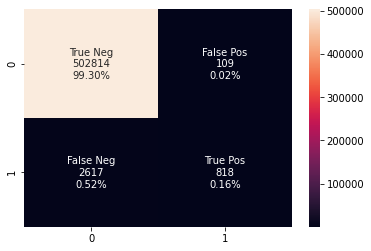

In [241]:
#confusion matrix for default threshold
cf_matrix = confusion_matrix(y_test,  pred_df['Old_Prediction'])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#sns.heatmap(confusion_matrix(y_test,  pred_df['Old_Prediction']),annot=True)

In default threshold, the False Negatives are significantly high. Have to reduce it by moving the threshold.

In [242]:
#Threshold Moving
#func for best threshold
def best_threshold(tpr,fpr):
    J = tpr - fpr
    ix = np.argmax(J) 
    best_thresh = thresholds[ix]
    return(f'Best Threshold',np.round(best_thresh,6))

In [243]:
# calculate roc curves with probability
fpr, tpr, thresholds = roc_curve(y_test, yhat)

In [244]:
best_threshold(tpr,fpr)

('Best Threshold', 0.015582)

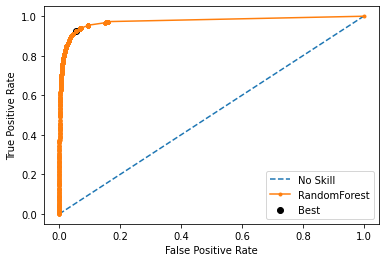

In [245]:
# plot the roc curve for the model
ix = np.argmax(tpr-fpr)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [246]:
#Calculating  AUC-ROC using revised decision Threshold

pred_df['New Prediction'] = pred_df['Old Probabilities'].map(lambda x : 1 if x >= best_threshold(tpr,fpr)[1] else 0)

In [247]:
#New Area  Under-ROC
fpr_new, tpr_new, _ = roc_curve(y_test,  pred_df['New Prediction'])
roc_auc = auc(fpr_new, tpr_new)
print("New Area under the ROC curve : %f" % roc_auc)

New Area under the ROC curve : 0.934804


The Area under the roc curve has improved from 62% to 94%


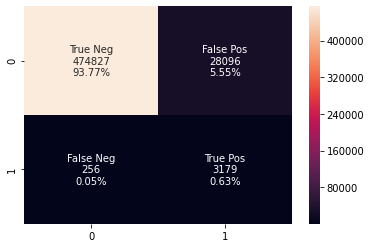

In [248]:
#confusion matrix for revised decision threshold
cf_matrix = confusion_matrix(y_test,  pred_df['New Prediction'])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")

False Negatives(Beta Error) has reduced significantly at the cost of False positives.

## Comparison


In [249]:
#Training score
from sklearn.metrics import roc_auc_score
pred_train=RF.predict(x_train)
print(f'The training roc_auc score is : {roc_auc_score(y_train,pred_train)}')
print(f"The testing roc_auc score is : {roc_auc_score(y_test, pred_df['New Prediction'])}")

The training roc_auc score is : 0.9724297151311562
The testing roc_auc score is : 0.9348038302580929


This difference in scores can be eliminated using cross validation techniques

### Default Threshold

In [237]:
#accuracy
print(f"The default threshold accuracy score in {accuracy_score(y_test,  pred_df['Old_Prediction'])}")
#Recall
print(f"The default threshold recall score in {recall_score(y_test,  pred_df['Old_Prediction'])}")
#Precission
print(f"The default threshold precision score in {precision_score(y_test,  pred_df['Old_Prediction'])}")

The default threshold accuracy score in 0.9946243566804513
The default threshold recall score in 0.24250363901018923
The default threshold precision score in 0.8740818467995802


### Tuned Threshold

In [238]:
#accuracy
print(f"The optimum threshold accuracy score in {accuracy_score(y_test,  pred_df['New Prediction'])}")
#Recall
print(f"The optimum threshold recall score in {recall_score(y_test,  pred_df['New Prediction'])}")
#Precission
print(f"The optimum threshold precision score in {precision_score(y_test,  pred_df['New Prediction'])}")

The optimum threshold accuracy score in 0.9296248899000312
The optimum threshold recall score in 0.9426491994177584
The optimum threshold precision score in 0.08372117075188748


## Feature Imporatance

In [241]:
df_feature=pd.DataFrame(RF.feature_importances_)
df_feature.columns=["importance"]

In [242]:
df_feature["feature"]=x_train.columns
df_feature

,importance,feature
0,0.102871,national_inv
1,0.024931,in_transit_qty
2,0.075941,forecast_3_month
3,0.078676,forecast_6_month
4,0.084802,forecast_9_month
5,0.052739,sales_1_month
6,0.068334,sales_3_month
7,0.075909,sales_6_month
8,0.088096,sales_9_month
9,0.053838,min_bank


In [243]:
df_feature=df_feature.sort_values(by=["importance"],ascending=True)

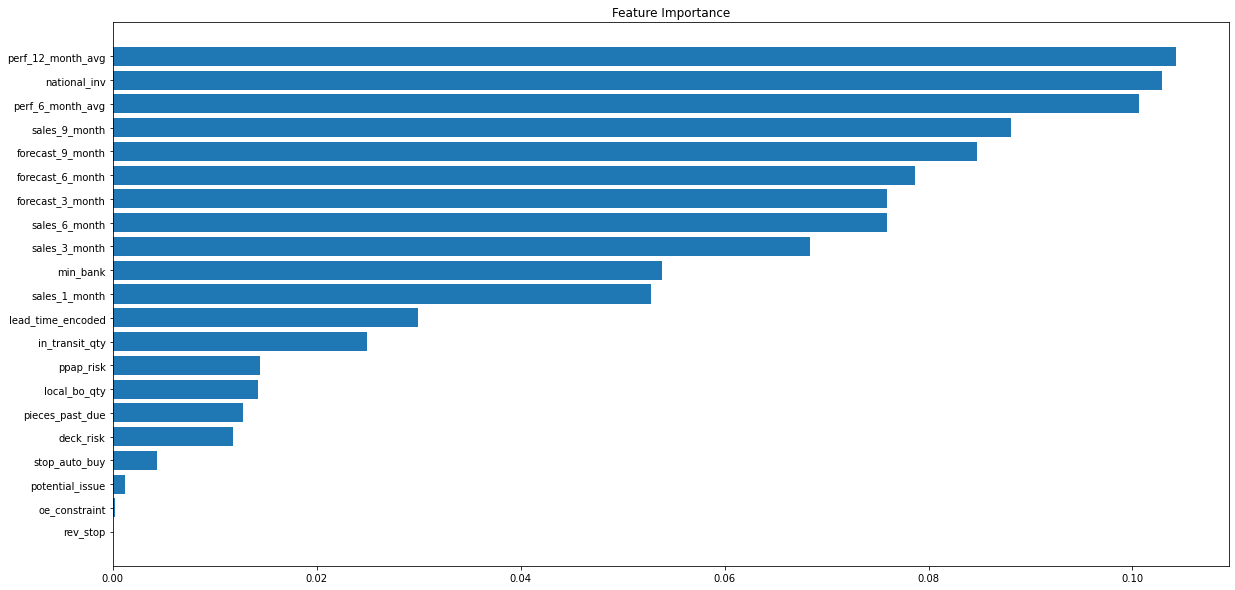

In [245]:
plt.figure(figsize=(20,10))

y_pos=np.arange(21)
plt.title("Feature Importance",)
plt.barh( y_pos,df_feature["importance"])
plt.yticks(y_pos,df_feature["feature"])
plt.show()

We can see that the current inventory level of the part and the source performance attributes have highest significance in predicting backorder status.(10% each).
The attributes Order_entry constraint, rev_stop and potential issue has least significance in predicting the target class(less than 1%).

So, with a particular products sales performance over the past one year and 6 months and also its current inventory level, a business can predict whether it is likely to have a surge in demand for that particular product and hence with some preplanning backorder can be avoided.

In [ ]:
---------------------------------------------------------------------------------

### Using K-fold Cross validation

In [60]:
X = df_train_final.drop('went_on_backorder',axis=1)
Y = df_train_final['went_on_backorder']

In [78]:
lr = LogisticRegression()
rf=RandomForestClassifier(n_estimators=200)

In [79]:
models = []
models.append(('Logistic Regression', lr))
models.append(('RandomForest', RF2))

models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=200,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False))]

In [80]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

### Accuracy Scores

Logistic Regression: 0.993174 (0.000008)
RandomForest: 0.995122 (0.000006)


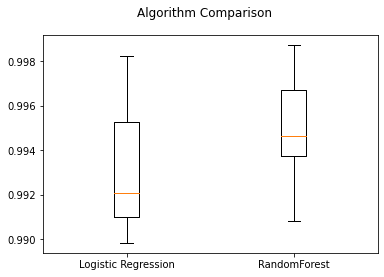

In [81]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=14)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Recall Scores

RandomForest: 0.314047 (0.009245)
Logistic Regression: 0.000676 (0.000001)


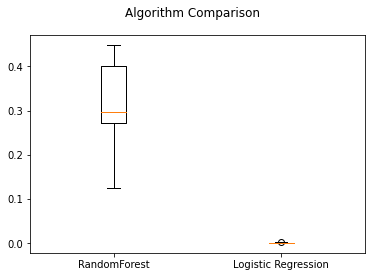

In [65]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=14)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Precision

RandomForest: 0.891451 (0.004771)
Logistic Regression: 0.036801 (0.001224)


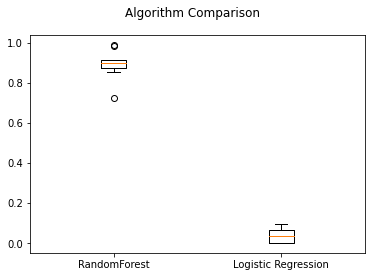

In [71]:
# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=14)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### ROC_AUC

AUC scores: 0.50 (+/- 0.00000) [Logistic Regression]
AUC scores: 0.64 (+/- 0.00002) [RandomForest]


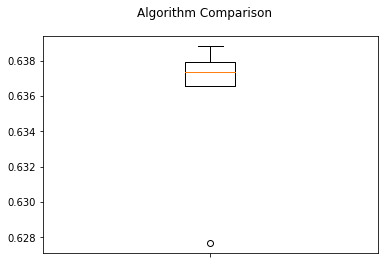

In [76]:
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
for name, model in models:
    roc_auc = []
    for train, test in kfold.split(X,Y):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:] #if X is dataframe , use iloc----
        Ytrain,Ytest = Y[train], Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict = model.predict(Xtest)
        #cm = metrics.confusion_matrix(Ytest, Y_predict)
        fpr,tpr, _ =roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr, tpr))
    print('AUC scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(roc_auc), np.var(roc_auc,ddof = 1), name))
 # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(roc_auc)
ax.set_xticklabels(names)
plt.show()

### Threshold Moving

In [197]:
#Since Random Forest performing good, We will tune threshold for Random Forest Only.
#Threshold Moving for Random Forest

In [168]:
models2 =  []
models2.append(('RandomForest', RF2))
models2

[('RandomForest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=200,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False))]

In [169]:
skfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=14)
for name, model in models2:
    positive_proba_list = []
    roc_auc = []
    best_threshold = []
       
    for train, test in skfold.split(X,Y):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:] 
        Ytrain,Ytest = Y[train], Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict = model.predict(Xtest)
        #positive probabilities
        y_proba = model.predict_proba(Xtest)[:,1]
        positive_proba_list.append(lis)
        
        fpr_au,tpr_au, thresh_au =roc_curve(Ytest,Y_predict)
        fpr,tpr, thresh =roc_curve(Ytest,y_proba)
        #thresholds
        j= tpr - fpr
        ind = np.argmax(j)
        b_thresh = thresh[ind]
        best_threshold.append(b_thresh)
        roc_auc.append(auc(fpr_au, tpr_au))
    print('AUC scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(roc_auc), np.var(roc_auc,ddof = 1), name))
    print(f'Best Threshold after cv:{np.mean(best_threshold)}')

AUC scores: 0.65 (+/- 0.00006) [RandomForest]
Best Threshold after cv:0.015931288046761735


In [196]:
for name, model in models2:
    roc_auc = []
    for train, test in skfold.split(X,Y):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:] #if X is dataframe , use iloc----
        Ytrain,Ytest = Y[train], Y[test]
        model.fit(Xtrain,Ytrain)
        Y_proba = model.predict_proba(Xtest)[:,1]
        y_proba_series=pd.Series(Y_proba)
        thresh = np.mean(best_threshold) 
        y_pred_new = y_proba_series.map(lambda x : 1 if x >= thresh else 0)
        #cm = metrics.confusion_matrix(Ytest, Y_predict)
        fpr,tpr, _ =roc_curve(Ytest,y_pred_new)
        roc_auc.append(auc(fpr, tpr))
    print('AUC scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(roc_auc), np.var(roc_auc,ddof = 1), name))
 

AUC scores: 0.94 (+/- 0.00002) [RandomForest]


The Roc-Auc has increased from 65% to 94%

In [198]:
#similarly we will check accuracy, precision and recall scores for Random forest with revised threshold

Accuracy for  revised threshold

In [199]:
for name, model in models2:
    accuracy = []
    for train, test in skfold.split(X,Y):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:] #if X is dataframe , use iloc----
        Ytrain,Ytest = Y[train], Y[test]
        model.fit(Xtrain,Ytrain)
        Y_proba = model.predict_proba(Xtest)[:,1]
        y_proba_series=pd.Series(Y_proba)
        thresh = np.mean(best_threshold) 
        y_pred_new = y_proba_series.map(lambda x : 1 if x >= thresh else 0)
        #cm = metrics.confusion_matrix(Ytest, Y_predict)
        acc =accuracy_score(Ytest,y_pred_new)
        accuracy.append(acc)
    print('Accuracy scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(accuracy), np.var(accuracy,ddof = 1), name))
 

AUC scores: 0.95 (+/- 0.00000) [RandomForest]


Precision for Revised Threshold

In [201]:
for name, model in models2:
    precision = []
    for train, test in skfold.split(X,Y):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:] #if X is dataframe , use iloc----
        Ytrain,Ytest = Y[train], Y[test]
        model.fit(Xtrain,Ytrain)
        Y_proba = model.predict_proba(Xtest)[:,1]
        y_proba_series=pd.Series(Y_proba)
        thresh = np.mean(best_threshold) 
        y_pred_new = y_proba_series.map(lambda x : 1 if x >= thresh else 0)
        #cm = metrics.confusion_matrix(Ytest, Y_predict)
        acc =precision_score(Ytest,y_pred_new)
        accuracy.append(acc)
    print('Precision scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(accuracy), np.var(accuracy,ddof = 1), name))
 

Precision scores: 0.53 (+/- 0.18604) [RandomForest]


Recall for Revised Threshold


In [203]:
for name, model in models2:
    recall = []
    for train, test in skfold.split(X,Y):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:] #if X is dataframe , use iloc----
        Ytrain,Ytest = Y[train], Y[test]
        model.fit(Xtrain,Ytrain)
        Y_proba = model.predict_proba(Xtest)[:,1]
        y_proba_series=pd.Series(Y_proba)
        thresh = np.mean(best_threshold) 
        y_pred_new = y_proba_series.map(lambda x : 1 if x >= thresh else 0)
        #cm = metrics.confusion_matrix(Ytest, Y_predict)
        acc =recall_score(Ytest,y_pred_new)
        accuracy.append(acc)
    print('Recall scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(accuracy), np.var(accuracy,ddof = 1), name))
 

Precision scores: 0.66 (+/- 0.15985) [RandomForest]


In [211]:
df_feature2=pd.DataFrame(RF2.feature_importances_)
df_feature2.columns=["importance"]

In [212]:
df_feature2['feature'] = X.columns

In [213]:
df_feature2

,importance,feature
0,0.102457,national_inv
1,0.026052,in_transit_qty
2,0.075618,forecast_3_month
3,0.079029,forecast_6_month
4,0.085268,forecast_9_month
5,0.051350,sales_1_month
6,0.067393,sales_3_month
7,0.075469,sales_6_month
8,0.088743,sales_9_month
9,0.055125,min_bank


In [214]:
df_feature2=df_feature2.sort_values(by=["importance"],ascending=True)
df_feature2

,importance,feature
19,0.000063,rev_stop
16,0.000299,oe_constraint
10,0.001074,potential_issue
18,0.004282,stop_auto_buy
15,0.012081,deck_risk
11,0.012230,pieces_past_due
17,0.014026,ppap_risk
14,0.014085,local_bo_qty
1,0.026052,in_transit_qty
20,0.029840,lead_time_encoded


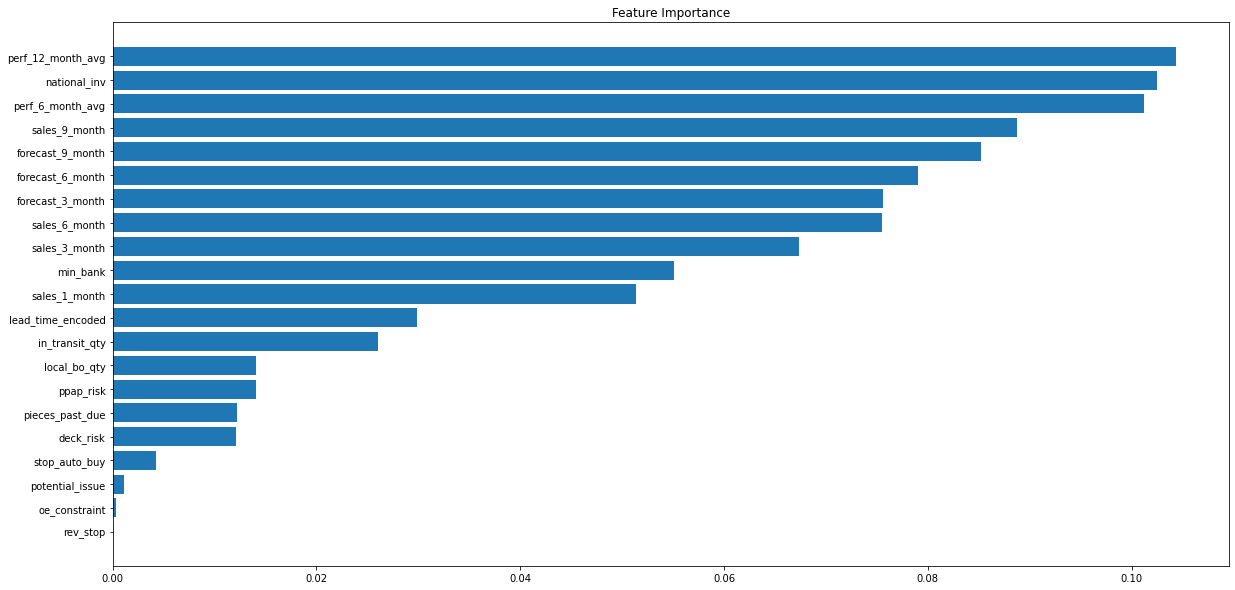

In [215]:
plt.figure(figsize=(20,10))

y_pos=np.arange(21)
plt.title("Feature Importance",)
plt.barh( y_pos,df_feature2["importance"])
plt.yticks(y_pos,df_feature2["feature"])
plt.show()

We can see that the current inventory level of the part and the source performance attributes have highest significance in predicting backorder status.(10% each).
The attributes Order_entry constraint, rev_stop and potential issue has least significance in predicting the target class(less than 1%).

So, with a particular products sales performance over the past one year and also its current inventory level, a business can predict whether it is likely to have a surge in demand for that particular product and hence with some preplanning backorder can be avoided.